In [2]:
import numpy as np
import pandas as pd
import random
from datetime import datetime as dt

**POI sentiment data for 2001**

In [3]:
df_poi_sentiment = pd.read_csv("poi_emails_sentiment.csv")

In [4]:
## Convert sentiment to numbers
sents = []
for sentiment in df_poi_sentiment['Sentiment']: 
    if sentiment == 'POSITIVE': 
        sents += [1]
    else:
        sents += [0]
df_poi_sentiment['Sentiment value'] = sents


month = []
for date_str in df_poi_sentiment.Datetime:
    date_object = dt.strptime(date_str, '%Y-%m-%d %H:%M:%S').date()
    month += [date_object.month]
df_poi_sentiment['Month'] = month

year = []
for date_str in df_poi_sentiment.Datetime:
    date_object = dt.strptime(date_str, '%Y-%m-%d %H:%M:%S').date()
    year += [date_object.year]
df_poi_sentiment['Year'] = year
df_poi_sentiment['Year'].unique()


array([2001, 2000, 2002])

In [7]:
for year in df_poi_sentiment['Year']:
    year_index = df_poi_sentiment.index[ (df_poi_sentiment['Year'] == 2001) ].tolist()
df_poi_sentiment_2001 = df_poi_sentiment.loc[df_poi_sentiment.index[year_index]]
df_poi_sentiment_2001 = df_poi_sentiment_2001.reset_index()


In [10]:
## Get the indices of messages month by month
month_index = []
for i in range(12): 
    month_i_index = []
    month_i = i+1 #### COUNT STARTS AT 0!!!! Month 3 is 2+1
    # get the indices of all rows for this month
    for month in df_poi_sentiment_2001['Month']: 
        month_i_index = df_poi_sentiment_2001.index[(df_poi_sentiment_2001['Month'] == month_i)].tolist()               
    month_index += [month_i_index]

## There are 688 indices in month_index (distributed among 12 months)
count = 0
for list in month_index:
    count += len(list)

    
sentiment_dict_2001 = {}    
    
## Extract the sentiment for each month
current_month = 0 ## because I really just want a C-style for loop
for index_list in month_index:
    current_month += 1 ## We start at month 1, so increment right away
    ## Make a mini dataframe for the given month
    ## This contains all messages written by the given author in the given month
    df_month_sentiment = df_poi_sentiment_2001.loc[ df_poi_sentiment_2001.index[index_list] ]
    ## Count how many of them are positive by making an index list of postive ones
    for sentiment in df_month_sentiment['Sentiment']: 
        positive_index = df_month_sentiment.index[(df_month_sentiment['Sentiment'] == 'POSITIVE')].tolist()               
        negative_index = df_month_sentiment.index[(df_month_sentiment['Sentiment'] == 'NEGATIVE')].tolist()               
        sentiment_dict_2001[current_month] = [len(positive_index), len(negative_index)]

sentiment_dict_2001

{1: [40, 14],
 2: [51, 6],
 3: [5, 1],
 4: [6, 4],
 5: [34, 11],
 6: [35, 20],
 7: [35, 10],
 8: [46, 19],
 9: [43, 32],
 10: [35, 24],
 11: [23, 20],
 12: [19, 16]}

In [11]:
### The positivity ratio by month
positive_ratio_dict_2001 = {}
for month in sentiment_dict_2001:
    positive = sentiment_dict_2001[month][0]
    negative = sentiment_dict_2001[month][1]
    total = positive + negative
    positive_ratio_dict_2001[month] = positive/total
    
positive_ratio_dict_2001

{1: 0.7407407407407407,
 2: 0.8947368421052632,
 3: 0.8333333333333334,
 4: 0.6,
 5: 0.7555555555555555,
 6: 0.6363636363636364,
 7: 0.7777777777777778,
 8: 0.7076923076923077,
 9: 0.5733333333333334,
 10: 0.5932203389830508,
 11: 0.5348837209302325,
 12: 0.5428571428571428}

**The actual plot**

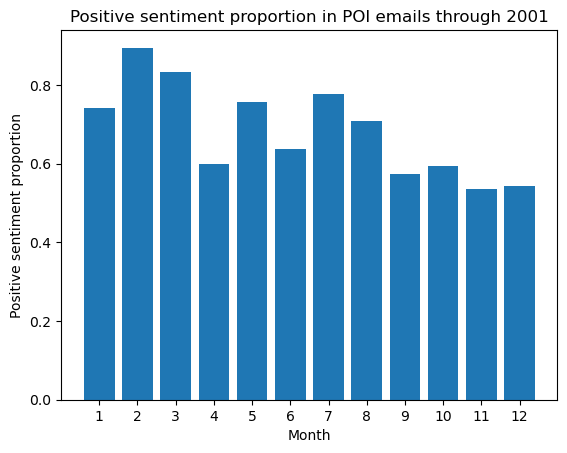

In [12]:
### Plot the sentiment for 2001

import matplotlib.pyplot as plt

# grab the y-value from the dictionary
x_values = []
y_values = []
for stuff in positive_ratio_dict_2001:
    x_values += [stuff]
    y_values += [ positive_ratio_dict_2001[stuff] ]
    number_items = len(y_values)

y = np.arange(number_items)
plt.bar(y, height = y_values)
plt.xticks(y, x_values)
plt.xlabel("Month")
plt.ylabel("Positive sentiment proportion")
plt.title("Positive sentiment proportion in POI emails through 2001")

plt.savefig('positive_sentiment_poi_2001.png')

**Exec sentiment data for 2001**

In [14]:
df_exec_sentiment = pd.read_csv("exec_selected_emails_sentiment.csv")

In [15]:
## Convert sentiment to numbers
sents = []
for sentiment in df_exec_sentiment['Sentiment']: 
    if sentiment == 'POSITIVE': 
        sents += [1]
    else:
        sents += [0]
df_exec_sentiment['Sentiment value'] = sents


month = []
for date_str in df_exec_sentiment.Datetime:
    date_object = dt.strptime(date_str, '%Y-%m-%d %H:%M:%S').date()
    month += [date_object.month]
df_exec_sentiment['Month'] = month

year = []
for date_str in df_exec_sentiment.Datetime:
    date_object = dt.strptime(date_str, '%Y-%m-%d %H:%M:%S').date()
    year += [date_object.year]
df_exec_sentiment['Year'] = year
df_exec_sentiment['Year'].unique()


array([2000, 2001, 1999, 2002])

In [16]:
## Get the indices of messages month by month
month_index = []
for i in range(12): 
    month_i_index = []
    month_i = i+1 #### COUNT STARTS AT 0!!!! Month 3 is 2+1
    # get the indices of all rows for this month
    for month in df_exec_sentiment['Month']: 
        month_i_index = df_exec_sentiment.index[(df_exec_sentiment['Month'] == month_i)].tolist()               
    month_index += [month_i_index]

## There are 688 indices in month_index (distributed among 12 months)
count = 0
for list in month_index:
    count += len(list)

    
sentiment_dict = {}    
    
## Extract the sentiment for each month
current_month = 0 ## because I really just want a C-style for loop
for index_list in month_index:
    current_month += 1 ## We start at month 1, so increment right away
    ## Make a mini dataframe for the given month
    ## This contains all messages written by the given author in the given month
    df_month_sentiment = df_exec_sentiment.loc[ df_exec_sentiment.index[index_list] ]
    ## Count how many of them are positive by making an index list of postive ones
    for sentiment in df_month_sentiment['Sentiment']: 
        positive_index = df_month_sentiment.index[(df_month_sentiment['Sentiment'] == 'POSITIVE')].tolist()               
        negative_index = df_month_sentiment.index[(df_month_sentiment['Sentiment'] == 'NEGATIVE')].tolist()               
        sentiment_dict[current_month] = [len(positive_index), len(negative_index)]

sentiment_dict

{1: [91, 66],
 2: [46, 36],
 3: [41, 19],
 4: [39, 19],
 5: [59, 27],
 6: [26, 14],
 7: [28, 17],
 8: [56, 19],
 9: [54, 28],
 10: [136, 96],
 11: [106, 49],
 12: [80, 48]}

In [17]:
### The positivity ratio by month
positive_ratio_dict = {}
for month in sentiment_dict:
    positive = sentiment_dict[month][0]
    negative = sentiment_dict[month][1]
    total = positive + negative
    positive_ratio_dict[month] = positive/total
    
positive_ratio_dict

{1: 0.5796178343949044,
 2: 0.5609756097560976,
 3: 0.6833333333333333,
 4: 0.6724137931034483,
 5: 0.686046511627907,
 6: 0.65,
 7: 0.6222222222222222,
 8: 0.7466666666666667,
 9: 0.6585365853658537,
 10: 0.5862068965517241,
 11: 0.6838709677419355,
 12: 0.625}

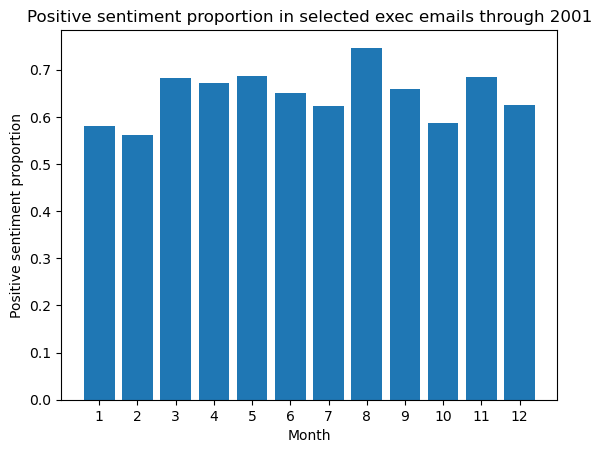

In [18]:
### Plot the sentiment for execs, 2001

import matplotlib.pyplot as plt

# grab the y-value from the dictionary
x_values = []
y_values = []
for stuff in positive_ratio_dict:
    x_values += [stuff]
    y_values += [ positive_ratio_dict[stuff] ]
    number_items = len(y_values)

y = np.arange(number_items)
plt.bar(y, height = y_values)
plt.xticks(y, x_values)
plt.xlabel("Month")
plt.ylabel("Positive sentiment proportion")
plt.title("Positive sentiment proportion in selected exec emails through 2001")

plt.savefig('positive_sentiment_exec_2001.png')

**Normal sentiment data for 2001**

In [19]:
df_normal_sentiment = pd.read_csv("normal_selected_emails_sentiment.csv")

In [20]:
## Convert sentiment to numbers
sents = []
for sentiment in df_normal_sentiment['Sentiment']: 
    if sentiment == 'POSITIVE': 
        sents += [1]
    else:
        sents += [0]
df_normal_sentiment['Sentiment value'] = sents


month = []
for date_str in df_normal_sentiment.Datetime:
    date_object = dt.strptime(date_str, '%Y-%m-%d %H:%M:%S').date()
    month += [date_object.month]
df_normal_sentiment['Month'] = month

year = []
for date_str in df_normal_sentiment.Datetime:
    date_object = dt.strptime(date_str, '%Y-%m-%d %H:%M:%S').date()
    year += [date_object.year]
df_normal_sentiment['Year'] = year
df_normal_sentiment['Year'].unique()


array([2000, 2001, 1999, 2002])

In [21]:
## Get the indices of messages month by month
month_index = []
for i in range(12): 
    month_i_index = []
    month_i = i+1 #### COUNT STARTS AT 0!!!! Month 3 is 2+1
    # get the indices of all rows for this month
    for month in df_normal_sentiment['Month']: 
        month_i_index = df_normal_sentiment.index[(df_normal_sentiment['Month'] == month_i)].tolist()               
    month_index += [month_i_index]

## There are 688 indices in month_index (distributed among 12 months)
count = 0
for list in month_index:
    count += len(list)

    
sentiment_dict = {}    
    
## Extract the sentiment for each month
current_month = 0 ## because I really just want a C-style for loop
for index_list in month_index:
    current_month += 1 ## We start at month 1, so increment right away
    ## Make a mini dataframe for the given month
    ## This contains all messages written by the given author in the given month
    df_month_sentiment = df_normal_sentiment.loc[ df_normal_sentiment.index[index_list] ]
    ## Count how many of them are positive by making an index list of postive ones
    for sentiment in df_month_sentiment['Sentiment']: 
        positive_index = df_month_sentiment.index[(df_month_sentiment['Sentiment'] == 'POSITIVE')].tolist()               
        negative_index = df_month_sentiment.index[(df_month_sentiment['Sentiment'] == 'NEGATIVE')].tolist()               
        sentiment_dict[current_month] = [len(positive_index), len(negative_index)]

sentiment_dict

{1: [70, 39],
 2: [52, 35],
 3: [82, 35],
 4: [83, 38],
 5: [67, 43],
 6: [44, 18],
 7: [50, 25],
 8: [67, 36],
 9: [75, 49],
 10: [93, 42],
 11: [57, 26],
 12: [47, 27]}

In [22]:
### The positivity ratio by month
positive_ratio_dict = {}
for month in sentiment_dict:
    positive = sentiment_dict[month][0]
    negative = sentiment_dict[month][1]
    total = positive + negative
    positive_ratio_dict[month] = positive/total
    
positive_ratio_dict

{1: 0.6422018348623854,
 2: 0.5977011494252874,
 3: 0.7008547008547008,
 4: 0.6859504132231405,
 5: 0.6090909090909091,
 6: 0.7096774193548387,
 7: 0.6666666666666666,
 8: 0.6504854368932039,
 9: 0.6048387096774194,
 10: 0.6888888888888889,
 11: 0.6867469879518072,
 12: 0.6351351351351351}

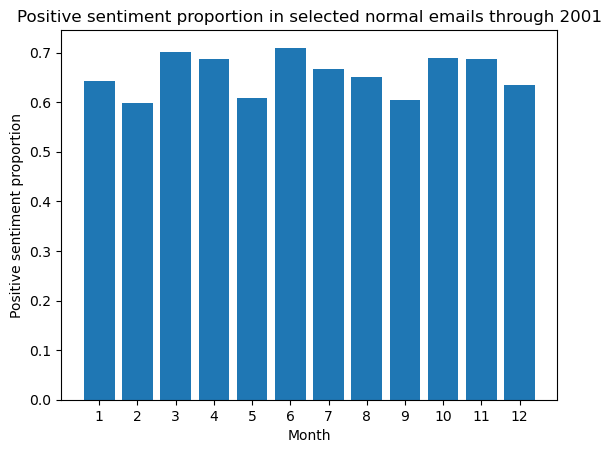

In [23]:
### Plot the sentiment for normal, 2001

import matplotlib.pyplot as plt

# grab the y-value from the dictionary
x_values = []
y_values = []
for stuff in positive_ratio_dict:
    x_values += [stuff]
    y_values += [ positive_ratio_dict[stuff] ]
    number_items = len(y_values)

y = np.arange(number_items)
plt.bar(y, height = y_values)
plt.xticks(y, x_values)
plt.xlabel("Month")
plt.ylabel("Positive sentiment proportion")
plt.title("Positive sentiment proportion in selected normal emails through 2001")

plt.savefig('positive_sentiment_normal_2001.png')